<br><br>
<div style="text-align: center">
<span style="color:black; font-size:50px; font-family: Cambria; text-align: center"><b><i>MultipathLocationEstimator</i> tutorials</b></span>
<br><br>
</div>

<span style=" font-size:19px; font-family: Calibri"><i>MultipathLocationEstimator</i> is an open-source Python class for link-level simulations over 5G digital communication systems, which contains several estimation algorythms for <b>user equipment</b> (UE) positioning.
</span>

<span style=" font-size:19px; font-family: Calibri">The official documentation can be found <a href="https://htmlpreview.github.io/?https://github.com/gomezcuba/py5g/blob/dev-locator/MultipathLocationEstimator.py">here</a> </span>

<span style=" font-size:19px; font-family: Calibri">
To understand the use of this class, it has been created two jupyter notebooks that provides different examples of implementation of the system, from the simplest case to the hardest.
Futhermore, this work is structurated in:
</span>

<span style=" font-size:20px; font-family: Calibri">1. <a href=https://github.com/gomezcuba/py5g/blob/dev-locator/Tutorial_1_MultipathLocationEstimator.ipynb>First tutorial: Getting Started with <i>MultipathLocationEstimator</i></a>
</span>

<span style=" font-size:25px; font-family: Calibri"><b>2. <a href="#A">Second tutorial: <i>MultipathLocationEstimator</i>, estimation algorythms</a></b>
</span>
<br><br><br>

<span name="abajo" style="color:black; font-size:35px; font-family: Cambria"><b>Second tutorial: <i>MultipathLocationEstimator</i>, estimation algorythms</b>
</span>

<span style=" font-size:19px; font-family: Calibri">
This second tutorial is focused in understanding how UE position is estimated and computed from the channel parameters. For this purpose, <i>MultipathLocationEstimator</i> class includes different estimation algorithms that will be described along the notebook, as well as a comparison of their performance, time execution and precision in the results.
</span><br><br>

<span style=" font-size:33px; font-family: Cambria"><b>Table of Contents:</b></span>
<br>

<div style = "text-indent: 30px">
    
<span style=" font-size:20px; font-family: Calibri; text-indent: 30px">1. <a href="#1">Problem statement</a>
</span>

<div style = "text-indent: 60px">
    
<span style=" font-size:20px; font-family: Calibri">1.1 <a href="#1.1">Constant offset error model</a>
</span>

<div style = "text-indent: 30px">
    
<span style=" font-size:20px; font-family: Calibri">2. <a href="#2">Geometric system representation</a>
</span>
    
<span style=" font-size:20px; font-family: Calibri">3. <a href="#3"><i>MultipathEstimationLocation</i> object</a>
</span>
    
<span style=" font-size:20px; font-family: Calibri">4. <a href="#4">Solving UE offset orientation</a>
</span>

<div style = "text-indent: 60px">

<span style=" font-size:20px; font-family: Calibri">4.1 <a href="#4.1">Brute force method</a>
</span>
    
<span style=" font-size:20px; font-family: Calibri">4.2 <a href="#4.2">Root method with 3-path position function</a>
</span>
    
<span style=" font-size:20px; font-family: Calibri">4.3 <a href="#4.3">Root method with linear sistem ecuation function</a>
</span>

<div style = "text-indent: 30px">

<span style=" font-size:20px; font-family: Calibri">5. <a href="#5">Solving UE location from estimated parameters</a>
</span> 
    
<span style=" font-size:20px; font-family: Calibri">6. <a href="#6">Performance of the estimators</a>
</span>

<span style=" font-size:20px; font-family: Calibri">7. <a href="#7">References</a>
</span>   
<br><br>

<a class="anchor" id="1"></a>
<span style="color:black; font-size:33px; font-family: Calibri"><b>1. Problem statement</b></span><br>

<span style=" font-size:19px; font-family: Calibri">The main goal of the <i>MultipathLocationEstimator</i> class is try to recover the UE position trigonometrically, define as ($x_0$, $y_0$), estimating the value of the <b>UE offset orientation</b> ($\psi_0$) from the knowledge of the set of the <b>Angles Of Departure</b> ($AoD$), <b>Angles Of Arrival</b> ($AoA$) and the <b>delays</b> introduced by the multipath channels.
</span>
<br>

<a class="anchor" id="1.1"></a>

<span style="color:black; font-size:28px; font-family: Calibri"><b>1.1 Constant offset error model</b>
</span>
  
<br>
<span style=" font-size:19px; font-family: Calibri"> 
In the previous tutorial, we have talked about how $\psi_0$ could affect $AoA$ measurement. Therefore, receiver’s $AoA$ will be positioned in a different random orientation with regard from the transmision system. 
<br><br>
In this notebook we will introduce another “constant offset” error, $\tau_e$, which will model the unknown initial propagation ray delay $\tau_0$ value for the LOS path. 
<br>
Fortunately, the relative delay-differences between scattering paths is known. So the differential delay measurements are performed in relation to the incorrect initial delay. What means that instead of knowing the values of delays between the different multipath channels:
\begin{equation}
dels = \tau_i - \tau_0
\end{equation}
<br>    
the receiver only knowns:
\begin{equation}
dels = \tau_i - (\tau_0 - \tau_e) = dels + \tau_e
\end{equation}
<br>  
<br><br>
Additionally, in this framework the initial clock offset error $\tau_e$ is due to the unknown LOS delay, and it's the same for all paths. We do not model individual independent noise components in the delay measurements. 
</span>
<br><br>

<span style="color:black; font-size:28px; font-family: Cambria"><b> In this first tutorial you will learn how to: </b></span>
<br>

<div style = "text-indent: 30px">

<span style=" font-size:19px; font-family: Calibri">* Understand the problem of clock error.</span>
<br>

<span style=" font-size:19px; font-family: Calibri">* Create an instance of the <i>MultipathLocationEstimator class</i>.</span>
<br>
 
<span style=" font-size:19px; font-family: Calibri">* Estimate the value of $\psi_0$ (offset orientation).</span>
<br>
   
<span style=" font-size:19px; font-family: Calibri">* Computing the value of the UE position.</span>
<br>
    
<span style=" font-size:19px; font-family: Calibri">* Test and compare the different algorithms that implements the class <i>MultipathLocationEstimator</i>.</span>
<br><br><br>

<br><br>
<span style="color:black; font-size:25px; font-family: Cambria"><b>Imports & Basics </b></span>
<br><b>

In [24]:
#Import MultipathLocationEstimator
import MultipathLocationEstimator

#Import for show the progress bar time execution
import time
from progress.bar import Bar

#Import for the optimization algorithms
import scipy.optimize as opt

#Import to use NumPy arrays
import numpy as np

#Import to create folders to save the images
import os

#Import for making plots 
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

plt.rcParams["figure.figsize"] = (18, 18)

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [25]:
#Create folders to save plots
Folder_dir = "Figures"
Folder_tutorial_2_dir = "tutorial_2"
Root_dir = os.path.dirname(os.path.abspath("Tutorial_2_MultipathLocationEstimator.ipyb"))

Folder_dir_path = os.path.join(Root_dir, Folder_dir)
Folder_tutorial_2_dir_path = os.path.join(Folder_dir_path, Folder_tutorial_2_dir)

#Check if the folders doesn't exist
if not os.path.exists(Folder_dir_path):
    os.makedirs(Folder_dir_path)  #### this command for creating directory

if not os.path.exists(Folder_tutorial_2_dir_path):
    os.makedirs(Folder_tutorial_2_dir_path)  #### this command for creating directory

<a class="anchor" id="2"></a>

<br><br><br>
<span style="color:black; font-size:33px; font-family: Cambria" name ="A"><b>2. Geometric system representation
</b></span><br>

In [89]:
# Number of scattering paths (number of scatters)
Npath = 10

# Number of total users allocated in the plane
Nuser = 1

In [90]:
# We generate random locations for scatters in a 100m [-50 y 50] square
# We place one scatter in each NLOS path
x_i = np.random.rand(Npath, Nuser)*100 - 50
y_i = np.random.rand(Npath, Nuser)*100 - 50

In [91]:
# We generate a random location for the Nuser users
x_0 = np.random.rand(Nuser)*100 - 50
y_0 = np.random.rand(Nuser)*100 - 50

print("x_0 = ",x_0[0])
print("y_0 = ",y_0[0])

x_0 =  -36.301480527956464
y_0 =  -40.79973805536401


In [92]:
# All angles are in radians units
# With el mod operator, we substract 2pi from the angle if it is higher than 2pi
theta_0 = np.arctan(y_0/x_0)
theta_0 = np.mod(theta_0 + np.pi*(x_0 < 0), 2*np.pi)

theta_i = np.arctan(y_i/x_i)
theta_i = np.mod(theta_i + np.pi*(x_i < 0), 2*np.pi)

psi_i = np.arctan((y_i - y_0)/(x_0 - x_i))
psi_i = np.mod(np.pi - psi_i + np.pi*((x_0 - x_i) < 0), 2*np.pi)

In [93]:
#We generate a random angle for UE offset
psi_0 = np.random.rand(Nuser)*2*np.pi

print("psi_0(rad) = ",psi_0[0], "rad")
print("psi_0(deg) = ",np.rad2deg(psi_0)[0], "º")

psi_0(rad) =  5.711113204343149 rad
psi_0(deg) =  327.2226829302981 º


In [94]:
AoD = np.mod(theta_i, 2*np.pi)

AoA = np.mod(psi_i - psi_0, 2*np.pi)

In [95]:
# Ligth speed
c = 3e8

# LOS path length
l_0 = abs(y_0/np.sin(theta_0))

# LOS path time delay
tau_0 = l_0/c 

# NLOS path length
l_i = np.abs(y_i/np.sin(theta_i)) + np.abs((y_i - y_0)/np.sin(psi_i))

# NLOS path time delay
tau_i = l_i/c

In [96]:
# Delay difference between LOS and NLOS paths
dels = tau_i - tau_0

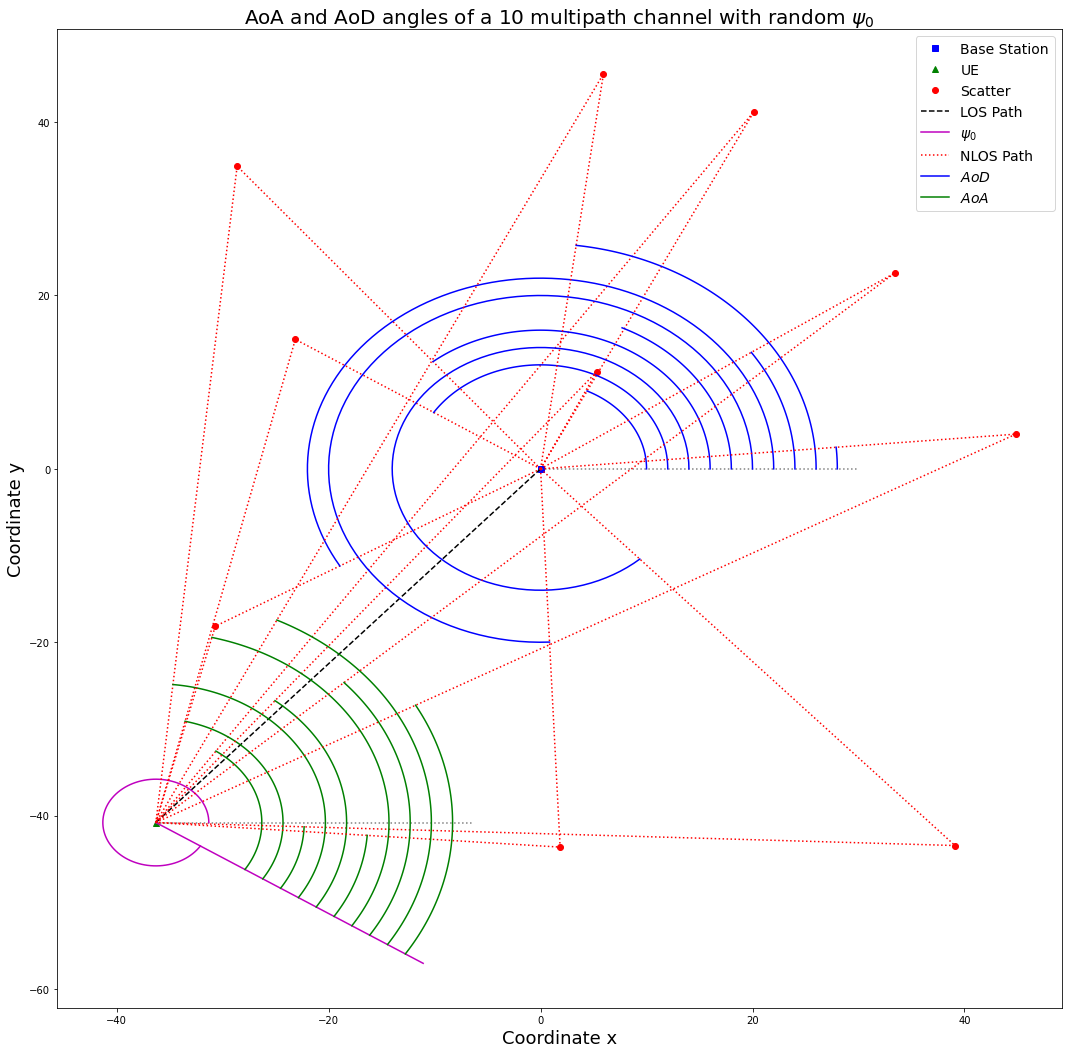

In [97]:
plt.figure(1)

# Plot the Base Station
plt.plot(0, 0, "sb", label="Base Station")

# Plot the user
plt.plot(x_0, y_0, "^g", label="UE")

# Plot the scatter
plt.plot(x_i, y_i, "or", label="Scatter")

# Plot LOS path
plt.plot([0,x_0], [0,y_0], "--k", label="LOS Path")

# Number of points to draw angles circunferences and size respect each origin (Base Station or UE)
circle_scale = 10
circle_points = 100
t = np.linspace(0, 1, circle_points)

# Plot x axis reference lines
plt.plot([0, circle_scale + Npath*2], [0,0],":", color="grey")
plt.plot([x_0, x_0 + circle_scale + Npath*2], [y_0,y_0], ":", color="grey")

# Plot psi_0 reference line
plt.plot([x_0, x_0 + np.cos(psi_0)*(circle_scale + Npath*2)], [y_0, y_0 + np.sin(psi_0)*(circle_scale + Npath*2)], color="m")

# Plot psi_0 angle
plt.plot(x_0 + (circle_scale/2)*np.cos((psi_0)*t), y_0 + (circle_scale/2)*np.sin((psi_0)*t), color="m", label="$\psi_0$")


for p in range(Npath):
    
    # Plot NLOS paths
    plt.plot([0,x_i[p],x_0], [0,y_i[p],y_0], ":r", label="NLOS Path")
    
    # Plot AoD angles
    plt.plot(0 + (circle_scale + p*2)*np.cos(AoD[p]*t), 0 + (circle_scale + p*2)*np.sin(AoD[p]*t), color="b", label="$AoD$")
    
    # Plot AoA angles
    x = np.array([(circle_scale + p*2)*np.cos(AoA[p]*t)])
    y = np.array([(circle_scale + p*2)*np.sin(AoA[p]*t)])
    
    rotated = np.concatenate((x, y), axis=0)
    
    newX = rotated[0,:] * np.cos(psi_0) - rotated[1,:] * np.sin(psi_0)
    newY = rotated[0,:] * np.sin(psi_0) + rotated[1,:] * np.cos(psi_0)
    
    plt.plot(x_0 + newX, y_0 + newY, color="g",label="$AoA$")

plt.title("AoA and AoD angles of a " + str(Npath) + " multipath channel with random $\psi_0$",  fontsize=20)
plt.xlabel("Coordinate x",  fontsize=18)
plt.ylabel("Coordinate y",  fontsize=18)

# Create and avoid label repetitions in the legends
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={"size": 14})

# Save Figure_3 image
plt.savefig(Folder_tutorial_2_dir_path + "/Figure_3.png")

<a class="anchor" id="3"></a>

<br><br>
<span style="color:black; font-size:33px; font-family: Cambria" name ="A"><b> 3. MultipathEstimationLocation object
</b></span><br>

<div style=" font-size:19px; font-family: Calibri">
The parameters of the MultipathEstimationLocation object instance are:
<br>
<div style = "background-color:#D0ECE7 ">
<br>
<b>-> <i>Npoint</i></b> : int, optional
    <br>Total point divisions in the minimization range of search.

<b>-> <i>Nref</i></b> : int, optional
    <br>Number of iterations of the algorithm to find and obtain the minimal value from the destiny fucntion.

<b>-> <i>Ndiv</i></b> : int, optional
    <br>Total divisions of the new range of search where the minimal solution was found in one iteration.

<b>-> <i>RootMethod</i></b>: str, optional
    <br>Type of solver.
<br><br>

In [98]:
# Instance of MultipathLocationEstimator object
loc = MultipathLocationEstimator.MultipathLocationEstimator(Npoint = 1000, Nref = 20, Ndiv = 2, RootMethod = "lm")

<a class="anchor" id="4"></a>

<br><br>
<span style="color:black; font-size:33px; font-family: Cambria" name ="A"><b> 4. Solving UE offset orientation
</b></span><br>

<span style=" font-size:19px; font-family: Calibri">In this section, we will introduce how to handle and estimate orientation error $\psi_0$. This constraint can hardly limit the performance of our positionning estimation algorithm due to its randomness and non-linearity. 
<br>    
Therefore, to deal with this offset we have designed some different methods that can compute its value with high precision in the estimation. From a brute forcing algorithm that looks over all posible points for the range of $\psi_0$, $[0, 2\pi]$, to a more fancy way that tries to search the solution of a non-linear ecuation using the provided method <i>root()</i> from <i>scipy.optimize</i> python library.
</span>

<div style=" font-size:19px; font-family: Calibri">
The parameters of the methods to estimate $\psi_0$ are:
<div style = "background-color:#D0ECE7 ">
<br>
<b>-> AoD</i></b>  : ndarray
    <br>Angles of departure of the NLOS ray propagation, mesured in the BS from de positive x-axis in the 
    non-colckwise.
            
<b>-> <i>AoA</i></b>  : ndarray
    <br>Angles of arrival of the NLOS ray propagation, mesured in the UE from de positive x-axis in the 
    non-colckwise sense. The value of psi_0 can modify the orientation of the x-axis.
            
<b>-> <i>dels</i></b> : ndarray
    <br>Delays introduced by the NLOS ray propagations.
    
<b>-> <i>Npoint</i></b> : int, optional
    <br>Total point divisions in the minimization range of search.
    
<b>-> <i>init_psi0</i></b>  : ndarray
    <br>Hint about the value of psi0.
<br><br>

<a class="anchor" id="4.1"></a>

<br><br>
<span style="color:black; font-size:28px; font-family: Cambria" name ="A"><b> 4.1 Brute force method
</b></span><br>

<span style=" font-size:19px; font-family: Calibri">
The brute force algorithm generates thousands os points in the interval $[0, 2\pi]$ and picks the one with the
lowest <b>minimun square error</b> (MSE).
<br><br>
The value of the estimated offset angle of the UE orientation is obtained by using the bisection algorithm.
For this purpose the method divides the range of the posible values of $\psi_0$, among 0 and 2$\pi$ into Npoints 
and minimize the error. The method reduces recurrently the range till minimize the error in $\psi_0$ estimation.
<br>
For this purpose the algorithm takes the sets of the $AoA$, $AoD$ and $delays$ values of 3 different NLOS paths and obtain all the posibles position vectors $(x_0, y_0)$ of the UE for the range of values especified by $\psi_0$.
</span>
</span>
<br><br>

In [99]:
# Number of points to search the psi_0 angle
Npoint = 1000
psi_0_search = np.linspace(0, 2*np.pi, Npoint).reshape(-1, 1)

In [100]:
# Compute all posible UE positions for psi_0_search range
(x0_3path, y0_3path, _) = loc.computePosFrom3PathsKnownPsi0(AoD[:,0], AoA[:,0], dels[:,0], psi_0_search)

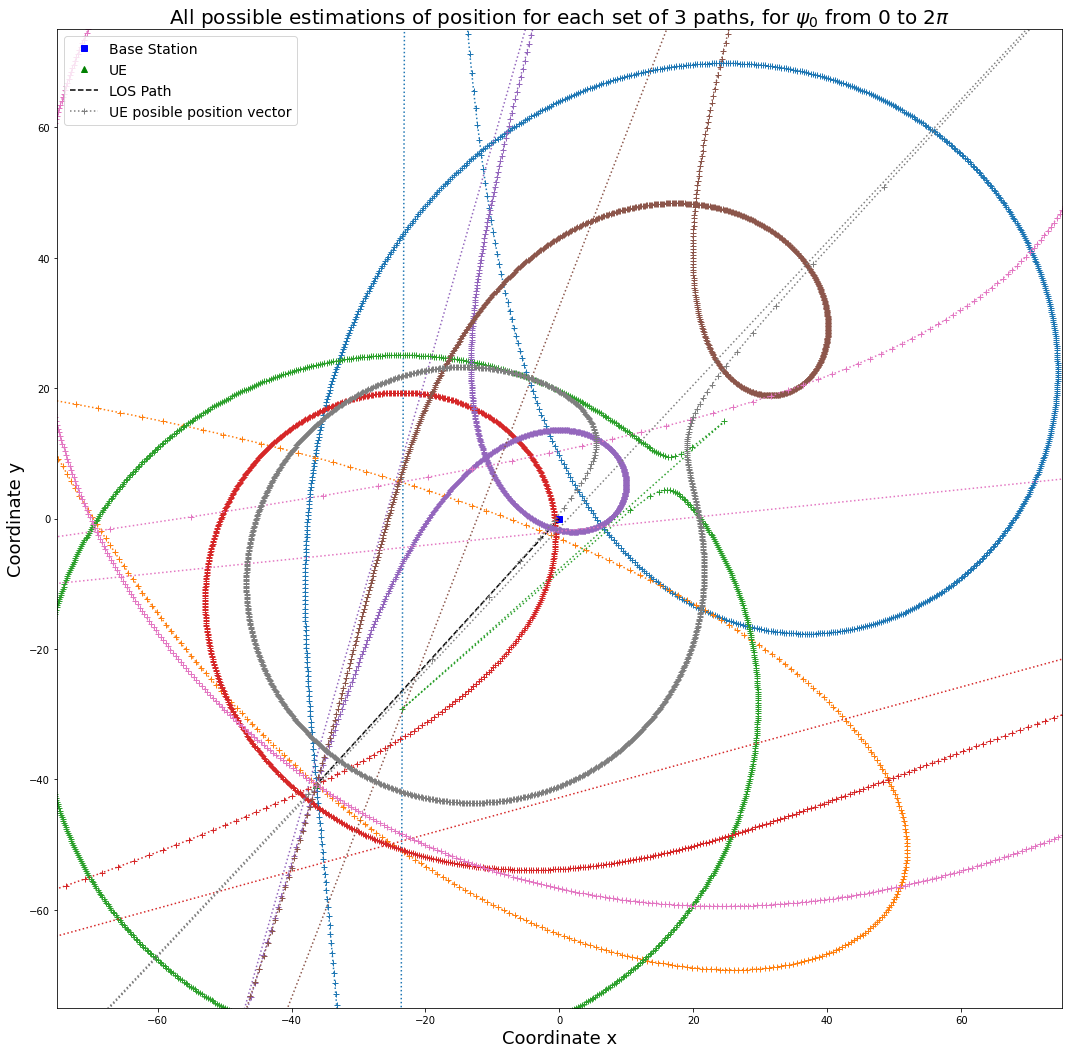

In [101]:
plt.figure(2)

# Plot the Base Station
plt.plot(0, 0, "sb", label="Base Station")

# Plot the user
plt.plot(x_0, y_0, "^g", label="UE")

# Plot LOS path
plt.plot([0, x_0], [0, y_0], "--k", label="LOS Path")

# Plot all vectors [x0, y0] solutions
plt.plot(x0_3path, y0_3path, ":+", label="UE posible position vector")

# Limits because curves diverge sharply
plt.axis([-75,75,-75,75])

plt.title("All possible estimations of position for each set of 3 paths, for $\psi_0$ from 0 to 2$\pi$", fontsize=20)
plt.xlabel("Coordinate x", fontsize=18)
plt.ylabel("Coordinate y", fontsize=18)

# Create and avoid label repetitions in the legends
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={"size": 14})

# Save Figure_4_1 image
plt.savefig(Folder_tutorial_2_dir_path + "/Figure_4_1.png")

<span style=" font-size:19px; font-family: Calibri">The figure above shows all the solutions described by the different posible positions of the UE, in function of the range of values of $\psi_0$. Each curve describes one system of linear ecuations obtained from the parameters values of 3 different multipath channels. So, if we have Npath NLOS paths, we can compute $(Npath-2)$ functions to estimate the value of $\psi_0$. As we can see in the plot, all curves cross at the same point, where the UE is located. Hence, at that point the value of the offset orientation is obtained.
<br><br>
Nevertheless, this method presents several disavantages. For some cases it's not accurate enough and diverges sharply when is far from the solution. 
</span>
<br><br>

In [102]:
psi0_bisec = loc.bisectPsi0ForAllPaths(AoD[:,0], AoA[:,0], dels[:,0], Npoint = None)

print("psi0_bisec = ", psi0_bisec[0], "rad")

psi0_bisec =  5.710843102021085 rad


<a class="anchor" id="4.2"></a>

<br><br>
<span style="color:black; font-size:28px; font-family: Cambria" name ="A"><b> 4.2 Root method with 3-path position function
</b></span><br>

<span style=" font-size:19px; font-family: Calibri">
In this case, the value of the estimated offset angle orientation is obtained by finding the zeros of the given vector function defined by <i>feval_wrapper_3PathPosFun</i>, this, defines the function to solve all the posible UE vector positions using the 3-path method. For this purpose, it uses the method <i>root()</i> to find the solutions.
<br><br>
This method also can receive an initial guess or hint about what is the value of $\psi_0$, so we can make a large aproximation with de bisetion algorithm to make a more acurate estimation using this estimator.
</span>
<br><br>

In [102]:
psi0_fsolve,_ = loc.solvePsi0ForAllPaths(AoD[:,0], AoA[:,0], dels[:,0], psi0_bisec)

print("psi0_fsolve = ", psi0_fsolve[0], "rad")

psi0_fsolve =  5.088176914162145 rad


<a class="anchor" id="4.3"></a>

<br><br>
<span style="color:black; font-size:28px; font-family: Cambria" name ="A"><b>4.3 Root method with linear sistem ecuation function
</b></span><br>

<span style=" font-size:19px; font-family: Calibri">
For this method the value of the estimated offset angle of the UE orientation is obtained by finding the zeros of the given vector function defined by <i>feval_wrapper_AllPathsLinear_drop1</i>, this takes the sets of the $AoA$, $AoD$ and $dels$ values of the all the NLOS $(Npath-1)$ paths combinations and obtained all the posibles position vectors (x0, y0) of the UE, for the range of values especified by $\psi_0$.
<br>
Returns the value of the function with the <b> non-linear minimun square error </b> NMSE. For this purpose, we use the method <i>root()</i> which is used to find the solutions of the this function.
<br><br>
This method also can receive an initial guess or hint about what is the value of $\psi_0$.
</span>
<br><br>

In [103]:
x0_linear = np.zeros((Npoint,Npath))
y0_linear = np.zeros((Npoint,Npath))
tauE_linear = np.zeros((Npoint,Npath))

for ct in range(psi_0_search.size):
    for gr in range(Npath):
        (x0_linear[ct,gr], y0_linear[ct,gr], tauE_linear[ct,gr], _, _) = loc.computeAllPathsLinear(AoD[np.arange(Npath) != gr], AoA[np.arange(Npath) != gr], dels[np.arange(Npath) != gr], psi_0_search[ct])

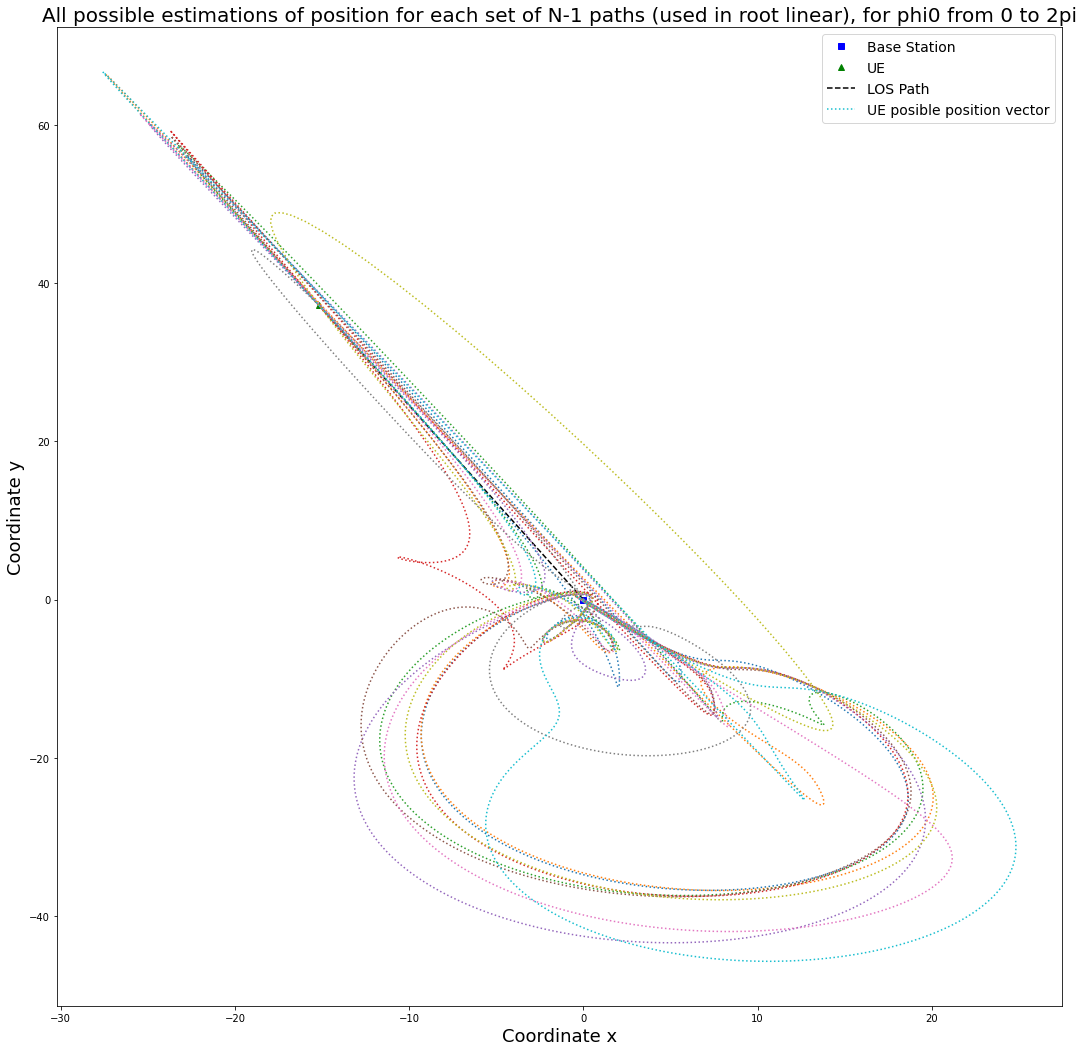

In [104]:
plt.figure(3)

# Plot the Base Station
plt.plot(0, 0, "sb", label="Base Station")

# Plot the user
plt.plot(x_0, y_0, "^g", label="UE")

# Plot LOS path
plt.plot([0, x_0], [0, y_0], "--k", label="LOS Path")

# Plot all vectors [x0, y0] solutions
plt.plot(x0_linear, y0_linear, ":", label="UE posible position vector")

plt.title("All possible estimations of position for each set of N-1 paths (used in root linear), for $\phi0$ from 0 to 2$\pi$", fontsize=20)
plt.xlabel("Coordinate x", fontsize=18)
plt.ylabel("Coordinate y", fontsize=18)

# Create and avoid label repetitions in the legends
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={"size": 14})

# Save Figure_4_3_1 image
plt.savefig(Folder_tutorial_2_dir_path + "/Figure_4_3_1.png")

<span style=" font-size:19px; font-family: Calibri">As we have seen before, for the 3-paths method functions, here the curves obtained shows a more elegant solution to compute UE position. Futhermore, this method presents several avantages. It's more accurate and curves diverges less sharply. 
</span>
<br><br>

/home/gonzalo/miniconda3/envs/tfg-env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
/home/gonzalo/miniconda3/envs/tfg-env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:1859: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


NameError: name 'x0_linear' is not defined

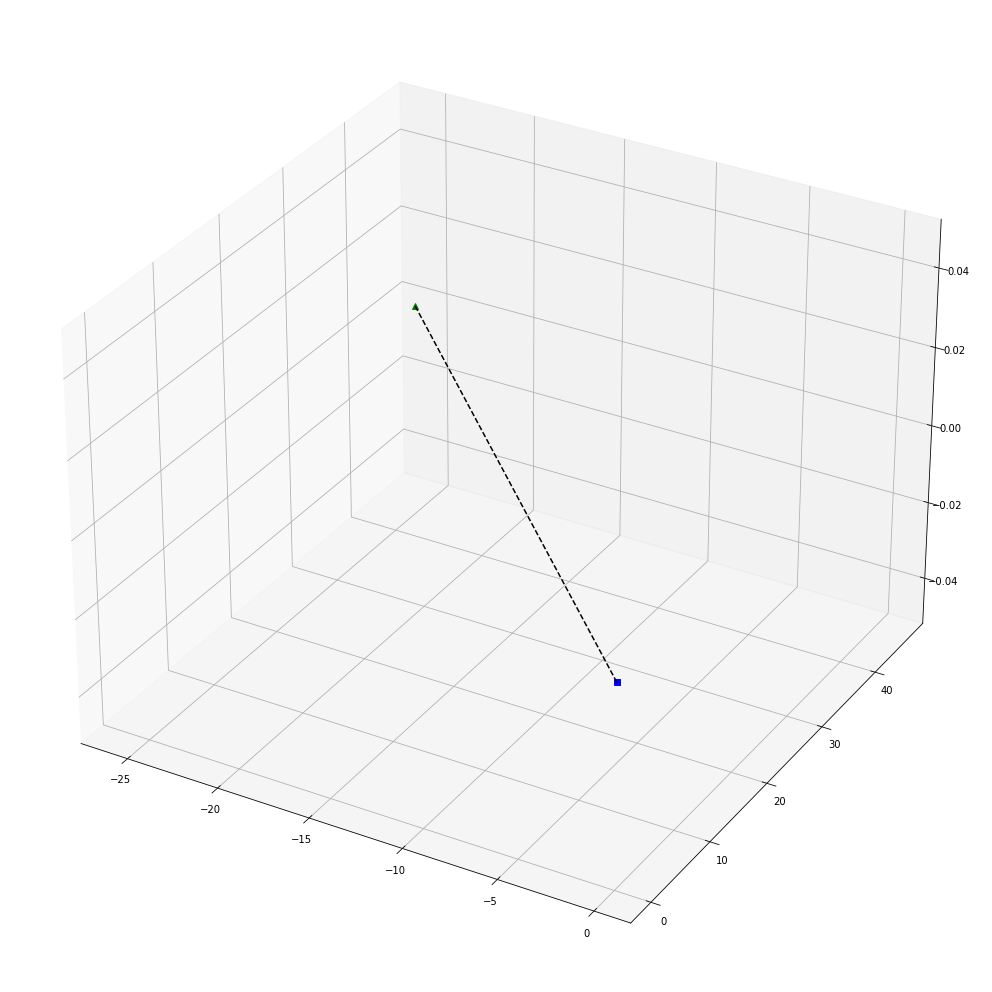

In [18]:
plt.figure(4)
ax = plt.axes(projection = "3d")

# Plot the Base Station
ax.plot3D([0], [0], [0], "sb", label="Base Station")

# Plot the UE
ax.plot3D(x_0, y_0, [0], "^g", label="UE")

# Plot LOS path
ax.plot3D([0, x_0], [0, y_0], "--k", label="LOS Path")

# Plot all vectors [x0, y0] solutions
for gr in range(Npath):
    ax.plot3D(x0_linear[:,gr], y0_linear[:,gr], tauE_linear[:,gr], ':', label="UE posible position vector")
    
plt.title("All possible estimations of position and delay, for each set of N-1 paths (used in root linear), for $\psi_0$ from 0 to 2$\pi$", fontsize=20)
ax.set_xlabel("Coordinate x", fontsize=18)
ax.set_ylabel("Coordinate y", fontsize=18)
ax.set_zlabel("Delay", fontsize=18)

# Create and avoid label repetitions in the legends
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={"size": 14})

# Save Figure_4_3_2 image
plt.savefig(Folder_tutorial_2_dir_path + "/Figure_4_3_2.png")

<span style=" font-size:19px; font-family: Calibri">Here, we present a more clear figure of how UE posibles positions are obtain in function of the value of $\psi_0$. We have added one more dimension, related with delays between multipath channel paths. We can see again that all curves converge to the same point, where the UE is located. 
</span>
<br><br>

In [106]:
psi0_fsolve_linear,_ = loc.solvePsi0ForAllPaths_linear(AoD, AoA, dels, psi0_bisec)

print("psi0_fsolve_linear = ", psi0_fsolve_linear[0], "rad")

psi0_fsolve_linear =  5.088176914176167 rad


<a class="anchor" id="5"></a>

<br><br>
<span style="color:black; font-size:33px; font-family: Cambria" name ="A"><b> 5. Solving UE location
</b></span><br>

<span style=" font-size:19px; font-family: Calibri">
Once we have understood all parameters and constraints of our system model, it's time to perfom the UE location.
For this purpose <i>MultipathLocationEstimator</i> includes several methods that helps to achieve this task. All of them are wrapped in one parametric function that helps the user to make use of the algorithms, the function <i>computeAllLocationsFromPaths</i>. This, returns the estimated position of the UE and scatters along the multipath channels and computes the estimation for the orientation offset $\psi_0$.
<br><br>
This first part, will be focused in how to use the different method options and how it performs the UE position for a non-real channel measuremets. Afterwards we are going to introduce some delay_error in the $dels$ estimation and some noise in the $AoA$ and $AoD$ measurements to test how accuracy and robust is the algorithm.
</span>
<br><br>

<div style=" font-size:19px; font-family: Calibri">
The parameter method calls:

<div style = "background-color:#D0ECE7 ">
<br>
-> <b>'bisec'</b> : 
<br><i>bisectPsi0ForAllPaths()</i> to estimate $\psi_0$ and <i>computePosFrom3PathsKnownPsi0</i> to return the UE position.
    
-> <b>'fsolve'</b> : 
<br><i>solvePsi0ForAllPaths()</i> to estimate $\psi_0$ and <i>computePosFrom3PathsKnownPsi0</i> to return the UE position.

-> <b>'fsolve_linear'</b> : 
<br><i>solvePsi0ForAllPaths_linear()</i> to estimate $\psi_0$ and <i>computeAllPathsWithParams</i> to return the UE position.
<br><br>       

In [109]:
(psi0_bisec, x0_bisec, y0_bisec,_,_,_) = loc.computeAllLocationsFromPaths(AoD[:,0], AoA[:,0], dels[:,0], method='bisec', hint_psi0=None)

print("x0_bisec = ",x0_bisec[0])
print("y0_bisec = ",y0_bisec[0])

x0_bisec =  -15.177107852014856
y0_bisec =  37.201428202873146


In [110]:
(psi0_fsolve, x0_fsolve, y0_fsolve,_,_,_) = loc.computeAllLocationsFromPaths(AoD[:,0], AoA[:,0], dels[:,0], method='fsolve', hint_psi0=None)

print("x0_fsolve = ",x0_fsolve[0])
print("y0_fsolve = ",y0_fsolve[0])

x0_fsolve =  -15.178653265725291
y0_fsolve =  37.20459155072296


In [111]:
(psi0_fsolve_linear, x0_fsolve_linear, y0_fsolve_linear,_,_,_) = loc.computeAllLocationsFromPaths(AoD[:,0], AoA[:,0], dels[:,0], method='fsolve_linear', hint_psi0=None)

print("x0_fsolve_linear = ",x0_fsolve_linear)
print("y0_fsolve_linear = ",y0_fsolve_linear)

x0_fsolve_linear =  -15.178656585122663
y0_fsolve_linear =  37.2045948771527


In [112]:
(psi0_fsolve_linear_hint, x0_fsolve_linear_hint, y0_fsolve_linear_hint,_,_,_) = loc.computeAllLocationsFromPaths(AoD[:,0], AoA[:,0], dels[:,0], method='fsolve_linear', hint_psi0=psi0_bisec)

print("x0_fsolve_linear_hint = ",x0_fsolve_linear_hint)
print("y0_fsolve_linear_hint = ",y0_fsolve_linear_hint)

x0_fsolve_linear_hint =  -15.178656585122663
y0_fsolve_linear_hint =  37.2045948771527


<a class="anchor" id="5.2"></a>

<br><br>
<span style="color:black; font-size:28px; font-family: Cambria" name ="A"><b> 5.1 Solving UE location from estimated parameters
</b></span><br>

<span style=" font-size:19px; font-family: Calibri">
Until now we have not took in account posibles errors that can be taken for the measures of $AoA$ $AoD$ and $dels$ parameters. Next, we are going to use the methods that we have been using in the previous sections but introducing now some errors in the channel parameters measurements to simulate posibles errors introduced in this parameters computation. For this you can go back to section 1.1 to refresh clock offset error introduction.
</span>

In [259]:
# Number of scattering paths (number of scatters)
Npath = 10

# Number of total users allocated in the plane
Nuser = 1

In [260]:
# We generate random locations for scatters in a 100m [-50 y 50] square
# We place one scatter in each NLOS path
x_i = np.random.rand(Npath, Nuser)*100 - 50
y_i = np.random.rand(Npath, Nuser)*100 - 50

# We generate a random location for Nuser users
x_0 = np.random.rand(1, Nuser)*100 - 50
y_0 = np.random.rand(1, Nuser)*100 - 50

In [261]:
# All angles are in radians units
# With el mod operator, we substract 2pi from the angle if it is higher than 2pi
theta_0 = np.arctan(y_0/x_0)
theta_0 = np.mod(theta_0 + np.pi*(x_0 < 0), 2*np.pi)

theta_i = np.arctan(y_i/x_i)
theta_i = np.mod(theta_i + np.pi*(x_i < 0), 2*np.pi)

psi_i = np.arctan((y_i - y_0)/(x_0 - x_i))
psi_i = np.mod(np.pi - psi_i + np.pi*((x_0 - x_i) < 0), 2*np.pi)

In [262]:
# Ligth speed
c = 3e8

# LOS path length
l_0 = abs(y_0 / np.sin(theta_0))

# LOS path time delay
tau_0 = l_0 / c

# NLOS path length
l_i = np.abs(y_i / np.sin(theta_i)) + np.abs((y_i - y_0) / np.sin(psi_i))

# NLOS path time delay
tau_i = l_i / c

In [263]:
# We generate a random angle for the offset
psi_0 = np.random.rand(1,Nuser)*2*np.pi

In [264]:
Nanterr = 256

AoD = np.mod(theta_i + np.random.rand(Npath,Nuser)*2*np.pi/Nanterr, 2*np.pi)
AoA = np.mod(psi_i - psi_0 + np.random.rand(Npath,Nuser)*2*np.pi/Nanterr, 2*np.pi)

In [265]:
Tserr = 2.5e-9

#clock offset
clock_error = (40/c)*np.random.rand(1,Nuser)

#delay estimation error
del_error = (Tserr)*np.random.randn(Npath,Nuser)

dels = tau_i -tau_0 + clock_error + del_error

In [266]:
(psi0_bisec, x0_bisec, y0_bisec,_,_,_) = loc.computeAllLocationsFromPaths(AoD[:,0], AoA[:,0], dels[:,0], method='bisec', hint_psi0=None)

In [267]:
(psi0_fsolve, x0_fsolve, y0_fsolve,_,_,_) = loc.computeAllLocationsFromPaths(AoD[:,0], AoA[:,0], dels[:,0], method='fsolve', hint_psi0=None)

In [268]:
(psi0_fsolve_linear, x0_fsolve_linear, y0_fsolve_linear,_,_,_) = loc.computeAllLocationsFromPaths(AoD[:,0], AoA[:,0], dels[:,0], method='fsolve_linear', hint_psi0=None)

In [269]:
(psi0_fsolve_linear_hint, x0_fsolve_linear_hint, y0_fsolve_linear_hint,_,_,_) = loc.computeAllLocationsFromPaths(AoD[:,0], AoA[:,0], dels[:,0], method='fsolve_linear', hint_psi0=psi0_bisec)

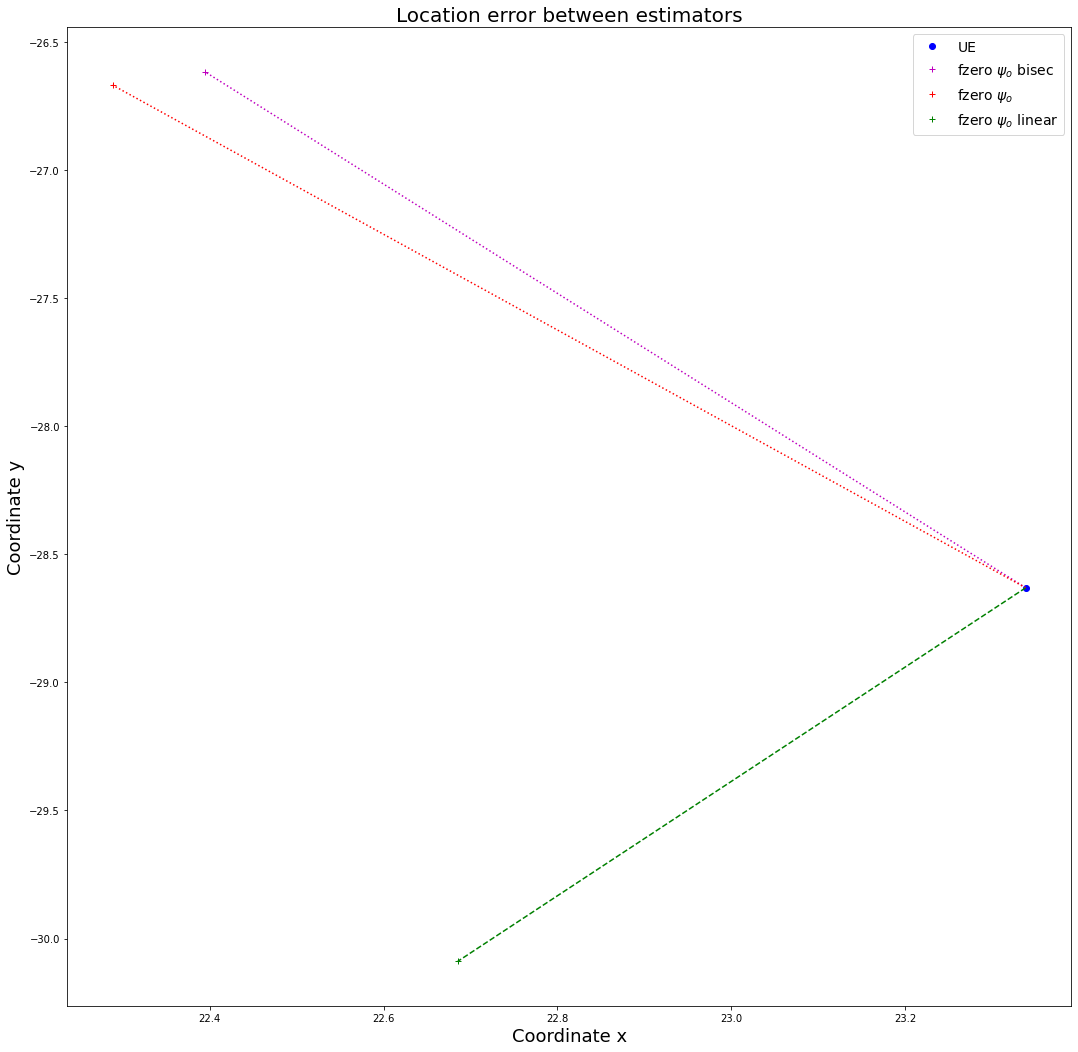

In [273]:
plt.figure(5)

plt.plot(x_0, y_0,'ob',label='UE')

plt.plot(x0_bisec, y0_bisec,'+m',label='fzero $\psi_o$ bisec')
plt.plot([x_0,x0_bisec], [y_0,y0_bisec], ":m")

plt.plot(x0_fsolve, y0_fsolve,'+r',label='fzero $\psi_o$')
plt.plot([x_0,x0_fsolve], [y_0,y0_fsolve], ":r")

plt.plot(x0_fsolve_linear, y0_fsolve_linear,'+g',label='fzero $\psi_o$ linear')
plt.plot([x_0,x0_fsolve_linear], [y_0,y0_fsolve_linear], ":g")

plt.title("Location error between estimators",  fontsize=20)
plt.xlabel("Coordinate x",  fontsize=18)
plt.ylabel("Coordinate y",  fontsize=18)
plt.legend(prop={"size": 14})

# Save Figure_5_1_A image
plt.savefig(Folder_tutorial_2_dir_path + "/Figure_5_1_A.png")

In [276]:
# Number of scattering paths (number of scatters)
Npath = 10

# Number of total users allocated in the plane
Nuser = 100

In [277]:
# We generate random locations for scatters in a 100m [-50 y 50] square
# We place one scatter in each NLOS path
x_i = np.random.rand(Npath, Nuser)*100 - 50
y_i = np.random.rand(Npath, Nuser)*100 - 50

# We generate a random location for Nuser users
x_0 = np.random.rand(1, Nuser)*100 - 50
y_0 = np.random.rand(1, Nuser)*100 - 50

In [278]:
# All angles are in radians units
# With el mod operator, we substract 2pi from the angle if it is higher than 2pi
theta_0 = np.arctan(y_0/x_0)
theta_0 = np.mod(theta_0 + np.pi*(x_0 < 0), 2*np.pi)

theta_i = np.arctan(y_i/x_i)
theta_i = np.mod(theta_i + np.pi*(x_i < 0), 2*np.pi)

psi_i = np.arctan((y_i - y_0)/(x_0 - x_i))
psi_i = np.mod(np.pi - psi_i + np.pi*((x_0 - x_i) < 0), 2*np.pi)

In [279]:
# Ligth speed
c = 3e8

# LOS path length
l_0 = abs(y_0 / np.sin(theta_0))

# LOS path time delay
tau_0 = l_0 / c

# NLOS path length
l_i = np.abs(y_i / np.sin(theta_i)) + np.abs((y_i - y_0) / np.sin(psi_i))

# NLOS path time delay
tau_i = l_i / c

In [280]:
# We generate a random angle for the offset
psi_0 = np.random.rand(1,Nuser)*2*np.pi

In [281]:
Nanterr = 256

AoD = np.mod(theta_i+np.random.rand(Npath,Nuser)*2*np.pi/Nanterr,2*np.pi)
AoA = np.mod(psi_i-psi_0+np.random.rand(Npath,Nuser)*2*np.pi/Nanterr,2*np.pi)

In [282]:
Tserr = 2.5e-9

#delay estimation error
clock_error=(40/c)*np.random.rand(1,Nuser)

#delay estimation error
del_error=(Tserr)*np.random.randn(Npath,Nuser)

dels = tau_i-tau_0+clock_error+del_error

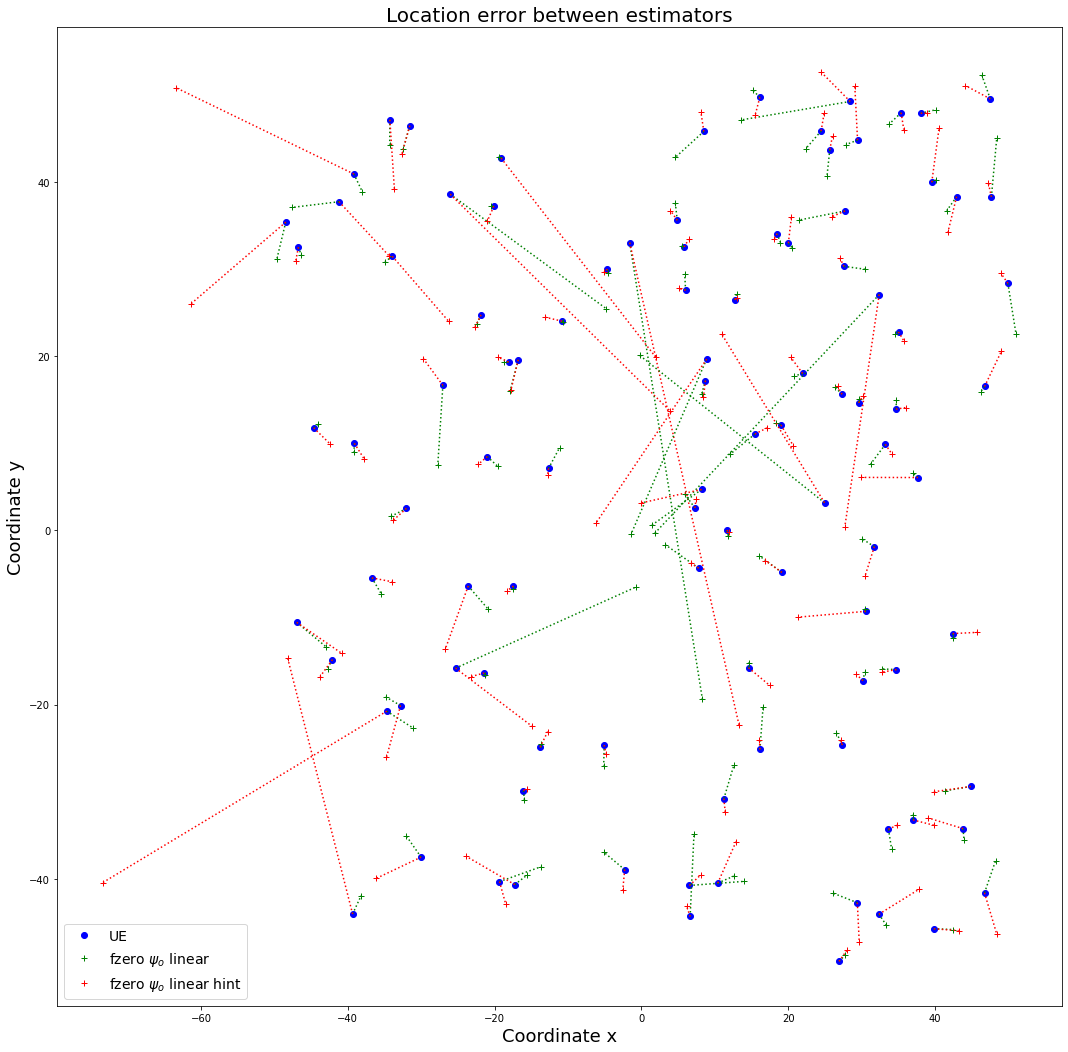

In [283]:
plt.figure(6)

plt.plot(x_0, y_0,'ob',label='UE')

for ue in range(Nuser):

    (psi0_fsolve, x0_fsolve, y0_fsolve,_,_,_) = loc.computeAllLocationsFromPaths(AoD[:,ue], AoA[:,ue], dels[:,ue], method='fsolve', hint_psi0=None)

    (psi0_fsolve_linear, x0_fsolve_linear, y0_fsolve_linear,_,_,_) = loc.computeAllLocationsFromPaths(AoD[:,ue], AoA[:,ue], dels[:,ue], method='fsolve_linear')    
    plt.plot(x0_fsolve_linear, y0_fsolve_linear,'+g',label='fzero $\psi_o$ linear')
    plt.plot([x_0[:,ue],x0_fsolve_linear], [y_0[:,ue],y0_fsolve_linear], ":g")

    (psi0_fsolve_linear_hint, x0_fsolve_linear_hint, y0_fsolve_linear_hint,_,_,_) = loc.computeAllLocationsFromPaths(AoD[:,ue], AoA[:,ue], dels[:,ue], method='fsolve')    
    plt.plot(x0_fsolve_linear_hint, y0_fsolve_linear_hint,'+r',label='fzero $\psi_o$ linear hint')
    plt.plot([x_0[:,ue],x0_fsolve_linear_hint], [y_0[:,ue],y0_fsolve_linear_hint], ":r")

plt.title("Location error between estimators",  fontsize=20)
plt.xlabel("Coordinate x",  fontsize=18)
plt.ylabel("Coordinate y",  fontsize=18)

# Create and avoid label repetitions in the legends
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={"size": 14})

# Save Figure_5_1_B image
plt.savefig(Folder_tutorial_2_dir_path + "/Figure_5_1_B.png")

<a class="anchor" id="6"></a>

<br><br>
<span style="color:black; font-size:33px; font-family: Cambria" name ="A"><b> 6. Performance of the estimators
</b></span><br>

<div style=" font-size:30px; font-family: Calibri">

| Method | Average time execution (ms) |
| --- | --- |
| Bisection | 1.10169 ms |
| Root | 4.34942 ms |
| Linear root | 39.64308 ms |

</div>

In [284]:
psi0_bisec_error = abs(psi_0 - psi0_bisec)

print("psi0_bisec_error = ", psi0_bisec_error[0][0])

psi0_bisec_error =  1.2897242851937265


In [285]:
psi0_fsolve_error = abs(psi_0 - psi0_fsolve)

print("psi0_fsolve_error = ", psi0_fsolve_error[0][0])

psi0_fsolve_error =  1.1421444508092296


In [286]:
psi0_fsolve_linear_error = abs(psi_0 - psi0_fsolve_linear)

print("psi0_fsolve_linear_error = ", psi0_fsolve_linear_error[0][0])

psi0_fsolve_linear_error =  1.1163661829231013


In [23]:
plt.figure(7)

t_start_b = time.time()
phi0_b=np.zeros((1,Nuser))
x0_b=np.zeros((1,Nuser))
y0_b=np.zeros((1,Nuser))
x_b=np.zeros((Npath,Nuser))
y_b=np.zeros((Npath,Nuser))
bar = Bar("bisec", max=Nuser)
bar.check_tty = False
for nsim in range(Nuser):
    (phi0_b[:,nsim],x0_b[:,nsim],y0_b[:,nsim],x_b[:,nsim],y_b[:,nsim],cov_psi0)= loc.computeAllLocationsFromPaths(AoD[:,nsim],AoA[:,nsim],dels[:,nsim],method='bisec',hint_psi0=None)
    bar.next()
bar.finish()
error_bisec=np.sqrt(np.abs(x_0-x0_b)**2+np.abs(y_0-y0_b))
t_run_b = time.time() - t_start_b
plt.figure(1)
plt.semilogx(np.sort(error_bisec).T,np.linspace(0,1,error_bisec.size),'b')

#
t_start_r= time.time()
phi0_r=np.zeros((1,Nuser))
x0_r=np.zeros((1,Nuser))
y0_r=np.zeros((1,Nuser))
x_r=np.zeros((Npath,Nuser))
y_r=np.zeros((Npath,Nuser))
bar = Bar("froot", max=Nuser)
bar.check_tty = False
for nsim in range(Nuser):
    (phi0_r[:,nsim],x0_r[:,nsim],y0_r[:,nsim],x_r[:,nsim],y_r[:,nsim],_) = loc.computeAllLocationsFromPaths(AoD[:,nsim],AoA[:,nsim],dels[:,nsim],method='fsolve',hint_psi0=None)
    bar.next()
bar.finish()
error_root=np.sqrt(np.abs(x_0-x0_r)**2+np.abs(y_0-y0_r))
t_run_r = time.time() - t_start_r
plt.semilogx(np.sort(error_root).T,np.linspace(0,1,error_root.size),'-.r')

#
t_start_r2= time.time()
phi0_r2=np.zeros((1,Nuser))
x0_r2=np.zeros((1,Nuser))
y0_r2=np.zeros((1,Nuser))
x_r2=np.zeros((Npath,Nuser))
y_r2=np.zeros((Npath,Nuser))
bar = Bar("froot_linear", max=Nuser)
bar.check_tty = False
for nsim in range(Nuser):
    (phi0_r2[:,nsim],x0_r2[:,nsim],y0_r2[:,nsim],x_r2[:,nsim],y_r2[:,nsim],_)= loc.computeAllLocationsFromPaths(AoD[:,nsim],AoA[:,nsim],dels[:,nsim],method='fsolve_linear')
    bar.next()
bar.finish()
error_root2=np.sqrt(np.abs(x_0-x0_r2)**2+np.abs(y_0-y0_r2))
t_run_r2 = time.time() - t_start_r2
plt.semilogx(np.sort(error_root2).T,np.linspace(0,1,error_root2.size),'-.g')

#
t_start_h= time.time()
phi0_h=np.zeros((1,Nuser))
x0_h=np.zeros((1,Nuser))
y0_h=np.zeros((1,Nuser))
x_h=np.zeros((Npath,Nuser))
y_h=np.zeros((Npath,Nuser))
bar = Bar("froot_linear hint", max=Nuser)
bar.check_tty = False
phi0_coarse=np.round(psi_0*256/np.pi/2)*np.pi*2/256
for nsim in range(Nuser):
    (phi0_h[:,nsim],x0_h[:,nsim],y0_h[:,nsim],x_h[:,nsim],y_h[:,nsim],_)= loc.computeAllLocationsFromPaths(AoD[:,nsim],AoA[:,nsim],dels[:,nsim],method='fsolve_linear',hint_psi0=phi0_coarse[:,nsim])
    bar.next()
bar.finish()
error_rooth=np.sqrt(np.abs(x_0-x0_h)**2+np.abs(y_0-y0_h))
t_run_h = time.time() - t_start_h
plt.semilogx(np.sort(error_rooth).T,np.linspace(0,1,error_rooth.size),'xk')

t_start_k= time.time()
x0_k=np.zeros((1,Nuser))
y0_k=np.zeros((1,Nuser))
x_k=np.zeros((Npath,Nuser))
y_k=np.zeros((Npath,Nuser))
bar = Bar("know phi 3-path method", max=Nuser)
bar.check_tty = False
for nsim in range(Nuser):
    (x0all,y0all,tauEall)=loc.computePosFrom3PathsKnownPsi0(AoD[:,nsim],AoA[:,nsim],dels[:,nsim],psi_0[:,nsim])
    x0_k[:,nsim]=np.mean(x0all)
    y0_k[:,nsim]=np.mean(y0all)
    bar.next()
bar.finish()
error_k=np.sqrt(np.abs(x_0-x0_k)**2+np.abs(y_0-y0_k))
t_run_k = time.time() - t_start_k
plt.semilogx(np.sort(error_k).T,np.linspace(0,1,error_k.size),':or')

t_start_k2= time.time()
x0_k2=np.zeros((1,Nuser))
y0_k2=np.zeros((1,Nuser))
x_k2=np.zeros((Npath,Nuser))
y_k2=np.zeros((Npath,Nuser))
bar = Bar("know phi linear method", max=Nuser)
bar.check_tty = False
for nsim in range(Nuser):
    (x0_k2[:,nsim],y0_k2[:,nsim],_,x_k2[:,nsim],y_k2[:,nsim])=loc.computeAllPathsLinear(AoD[:,nsim],AoA[:,nsim],dels[:,nsim],psi_0[:,nsim])
    bar.next()
bar.finish()
error_k2=np.sqrt(np.abs(x_0-x0_k2)**2+np.abs(y_0-y0_k2))
t_run_k2 = time.time() - t_start_k2
plt.semilogx(np.sort(error_k2).T,np.linspace(0,1,error_k2.size),':xg')

error_dumb=np.sqrt(np.abs(x_0-x)**2+np.abs(y_0-y)**2).reshape((-1))
plt.semilogx(np.sort(error_dumb).T,np.linspace(0,1,error_dumb.size),':k')

plt.xlabel('Location error(m)')
plt.ylabel('C.D.F.')
plt.legend(['brute force $\hat\psi_o$ 3path','fzero $\psi_o$ 3path','fzero $\psi_o$ linear','fzero $\psi_o$ linhint','$\psi_o$ known, 3path','$\psi_o$ known, linear','randomguess'], prop={"size": 14})
plt.savefig('cdflocgeosim.eps')

NameError: name 'figure' is not defined

<a class="anchor" id="6"></a>

<br><br>
<span style="color:black; font-size:33px; font-family: Cambria"><b> 7. References </b></span>
<br>


[1] Multipath absolute clock recovery and location, Felipe Gomez-Cuba.